# 모델 평가
모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
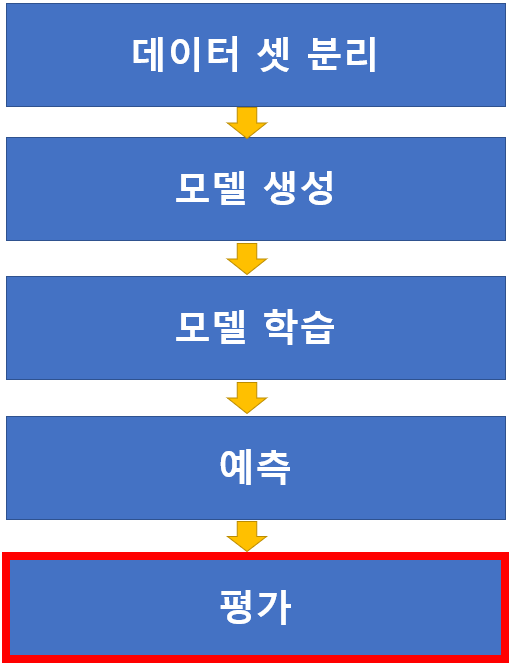

## 분류와 회귀의 평가방법
### 분류 평가 지표
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP
1. ROC, AUC

### 회귀 평가방법
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

### sckit-learn 평가함수 
- sklearn.metrics 모듈을 통해 제공

# 분류(Classification) 평가 기준
## 용어
- ### 이진 분류에서 양성(Positive)과 음성(Negative)
    - 양성: 예측하려는(찾으려는) 대상
    - 음성: 예측하려는 대상이 아닌 것
    - 예
        - 암환자 분류 : 양성 - 암 환자, 음성 - 정상인
        - 스팸메일 분류 : 양성 - 스팸메일, 음성 - 정상메일
        - 금융사기 모델: 양성 - 사기거래, 음성 - 정상거래
        
## 정확도 (Accuracy)

$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(모델예측값, 정답)`

### Accuracy 평가지표의 문제
- 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.


## MNIST Data set
- 손글씨 데이터 셋
- 사이킷런 제공 image size: 8 X 8 
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
X, y = digits['data'], digits['target']
X.shape, y.shape

((1797, 64), (1797,))

In [3]:
np.unique(y, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

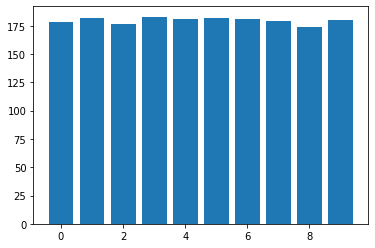

In [4]:
cnt = np.unique(y, return_counts = True)
plt.bar(cnt[0], cnt[1])
plt.show()

In [5]:
no0 = X[0].reshape(8,8)
no0

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

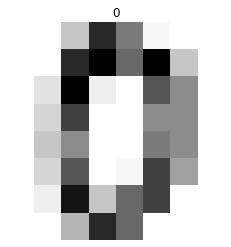

In [6]:
plt.imshow(no0, cmap = 'Greys')
plt.axis('off')  # 축을 off시킨다.
plt.title(y[0])
plt.show()

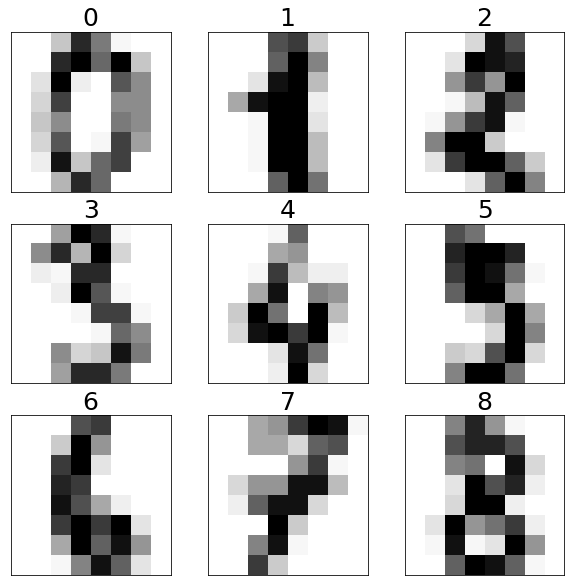

In [7]:
plt.figure(figsize = (10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap = 'Greys')
    plt.xticks([])  # 축은 존재하지만 틱(라벨)이 안나오도록 빈 행렬을 준다.
    plt.yticks([])
    plt.title(y[i], fontdict = {'fontsize':25})
    
plt.show()

### 불균형 데이터셋으로 만들기
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [8]:
y = y == 9  # 9는 True(1), 나머진 False(0)

In [9]:
cnt2 = np.unique(y, return_counts = True)
cnt2
# False인 애가 1617개, True인 애가 180개

(array([False,  True]), array([1617,  180]))

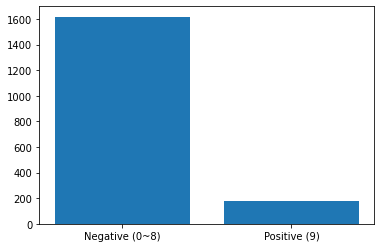

In [10]:
plt.bar(cnt2[0], cnt2[1])
plt.xticks([0, 1], labels = ['Negative (0~8)', 'Positive (9)'])
plt.show()

### 훈련, 테스트 데이터셋 분할

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

# y_train이 갖고있는 False, True의 개수를 y_train의 크기로 나누면 False/True의 비율을 볼 수 있다. 
print(np.unique(y_train, return_counts = True)[1] / y_train.size)
print(np.unique(y_test, return_counts = True)[1] / y_test.size  )

[0.89977728 0.10022272]
[0.9 0.1]


### 모델 생성 및 학습

#### Dummy Model 정의
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의한다.

In [12]:
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

class MyModel(BaseEstimator):
    
    def fit(self, X, y):
        cnt = np.unique(y, return_counts = True)
        max_idx = cnt[1].argmax()  # 최대값의 인덱스를 반환
        self.pred = cnt[0][max_idx]  # 최빈값을 instance 변수에 저장
        
    def predict(self, X):
        return np.full(shape = (X.shape[0], 1), fill_value = self.pred)

In [13]:
model = MyModel()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [14]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.8997772828507795, 0.9)

In [15]:
model = MyModel()
model.fit(X, digits['target'])
pred_X = model.predict(X)
np.unique(pred_X)

array([3])

In [16]:
accuracy_score(digits['target'], pred_X)

0.1018363939899833

## 혼동 행렬(Confusion Marix)
- 분류의 평가지표의 기준으로 사용된다.
- 혼동행렬을 이용해 다양한 평가지표(정확도, 재현률, 정밀도, F1 점수, AUC 점수)를 계산할 수 있다.
- 함수: confusion_matrix(정답, 모델예측값)
- 결과의 0번축: 실제(Ground Truth) class, 1번 축: 예측 class

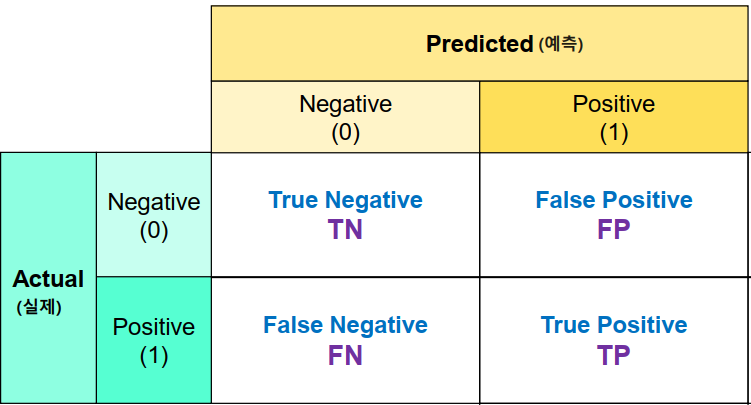

![img](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748)

- TP(True Positive) - 양성으로 예측했는데 맞은 개수
- TN(True Negative) - 음성으로 예측했는데 맞은 개수
- FP(False Positive) - 양성으로 예측했는데 틀린 개수 (음성을 양성으로 예측)
- FN(False Negative) - 음성으로 예측했는데 틀린 개수 (양성을 음성으로 예측)

## 이진 분류 평가점수
- ### Accuracy (정확도) 
    - 전체 데이터 중에 맞게 예측한 것의 비율
- ### Recall/Sensitivity(재현율/민감도) 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- ### Precision(정밀도) 
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- ### F1 점수
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐져 있지 않고 둘다 좋다고 판단할 수 있는 근거가 된다.
    
### 기타
- ### Specificity(특이도)
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - TNR(True Negative Rate) 라고도 한다.
- ### Fall out(위양성률)
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $ Fall-Out(FPR) = \cfrac{FP}{TN+FP}$

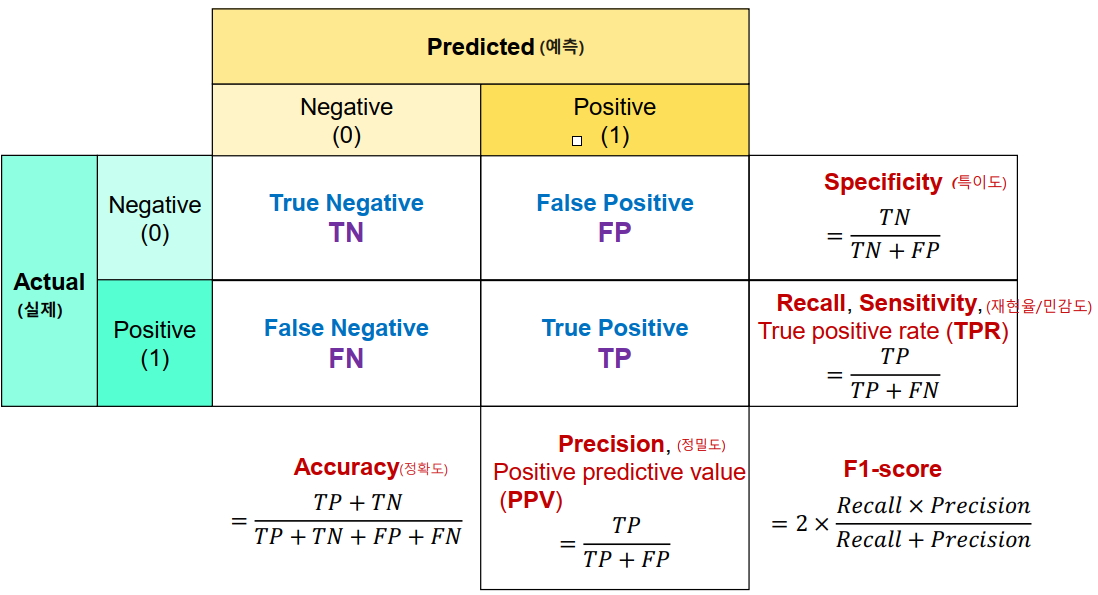

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- ### confusion_matrix(y 실제값, y 예측값)
    - 혼돈 행렬 반환
- ### recall_score(y 실제값, y 예측값) 
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- ### precision_score(y 실제값, y 예측값)
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- ### f1_score(y 실제값, y 예측값)
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- ### classification_report(y 실제값, y 예측값)    
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

###   Dummy 모델 혼동행렬
> plot_confusion_matrix함수: 버전 2.1.3에서 추가됨. 없다고 에러나는 경우 업데이트 필요 `pip install scikit-learn --upgrade`

In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [18]:
# pred_train, y_train : 예측값, 실제값
# pred_test, y_test: 예측값, 실제값
print("Train Confusion Matrix")
print(confusion_matrix(y_train, pred_train))

print('-' * 30)

print("Test Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

Train Confusion Matrix
[[1212    0]
 [ 135    0]]
------------------------------
Test Confusion Matrix
[[405   0]
 [ 45   0]]


In [19]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy = 'most_frequent')
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

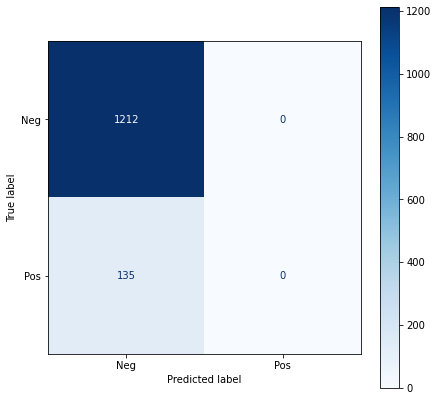

In [20]:
fig, ax = plt.subplots(1,1, figsize = (7,7))
plot_confusion_matrix(dummy_model,  # 학습시킬 모델
                      X_train,  # X
                      y_train,  # y
                      display_labels = ['Neg', 'Pos'],
                      cmap = 'Blues',
                      ax = ax  # ax를 직접 지정해서 크기를 직접 지정할 수 있다.
                      )
plt.show()

### dummy 모델 Accuracy, Recall, Precision, F1-Score

In [21]:
print('Accuracy')
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

Accuracy


(0.8997772828507795, 0.9)

In [22]:
print('Recall')  # 실제 9(양성) 중에 9로 잘 예측한 것을 보는 것
recall_score(y_train, pred_train), recall_score(y_test, pred_test)

# 맞춘게 하나도 없다!! -> 위의 plot_confusion_matrix 참고

Recall


(0.0, 0.0)

In [23]:
print("Precision")
precision_score(y_train, pred_train), precision_score(y_test, pred_test)

# 0 / (0 + 0)의 계산을 수행하게 될 것 -> 그래서 0으로 나누는 오류가 발생

Precision


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [24]:
print('f1 score')
f1_score(y_train, pred_train), f1_score(y_test, pred_test)

f1 score


(0.0, 0.0)

### 머신러닝 모델을 이용해 학습

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 모델 생성 
tree = DecisionTreeClassifier(max_depth = 3)
rf = RandomForestClassifier(n_estimators = 200)

# 모델 학습
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 예측
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

In [26]:
# 검증
# confusion matrix
print(confusion_matrix(y_train, pred_train_tree))
print(confusion_matrix(y_test, pred_test_tree))

[[1177   35]
 [  37   98]]
[[394  11]
 [ 11  34]]


In [27]:
print(confusion_matrix(y_train, pred_train_rf))
print(confusion_matrix(y_test, pred_test_rf))

[[1212    0]
 [   0  135]]
[[405   0]
 [  8  37]]


In [28]:
print("Tree 모델 평가지표")
accuracy_score(y_test, pred_test_tree), recall_score(y_test, pred_test_tree), precision_score(y_test, pred_test_tree), f1_score(y_test, pred_test_tree)

Tree 모델 평가지표


(0.9511111111111111,
 0.7555555555555555,
 0.7555555555555555,
 0.7555555555555555)

In [29]:
print('RandomForest 모델 평가지표')
accuracy_score(y_test, pred_test_rf), recall_score(y_test, pred_test_rf), precision_score(y_test, pred_test_rf), f1_score(y_test, pred_test_rf)

RandomForest 모델 평가지표


(0.9822222222222222, 0.8222222222222222, 1.0, 0.9024390243902439)

### classification_report()


In [30]:
from sklearn.metrics import classification_report
result = classification_report(y_test, pred_test_rf, target_names = ['neg:not 9', 'pos:9'])
print(result)

              precision    recall  f1-score   support

   neg:not 9       0.98      1.00      0.99       405
       pos:9       1.00      0.82      0.90        45

    accuracy                           0.98       450
   macro avg       0.99      0.91      0.95       450
weighted avg       0.98      0.98      0.98       450



## 재현율과 정밀도의 관계

**이진 분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율)이 중요한 업무가 있다.**

#### 재현율이 더 중요한 경우
- $ \cfrac{TP}{TP+FN}$
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 초점을 맞춘다.
    - Positive라고 예측하는 경우를 늘려줘야 한다. -> 이를 통해 TP는 늘어날 수 있지만, FP도 오름
- 암환자 판정 모델(암-Positive인 경우), 보험사기적발 모델

#### 정밀도가 더 중요한 경우
- $ \cfrac{TP}{TP+FP}$
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
     - Negative라고 예측하는 경우를 늘려줘야 한다. -> 이를 통해 TN은 늘어날 수 있지만, FN도 오름
- 스팸메일 판정 (스팸-Positive인 경우)

#### 재현율과 정밀도는 trade-off 관계에 있다.

## 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- 임계값 : 모델이 분류의 답을 결정할 때 기준값
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다. (ex: 암환자 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 암환자로 예측하게 된다.)
    
### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
    - **임계값을 낮추면 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 음의 상관관계를 가진다.**
- 임계값을 변화시켰을때 재현율과 위양성율(Fall-Out/FPR)은 양의 상관관계를 가진다.


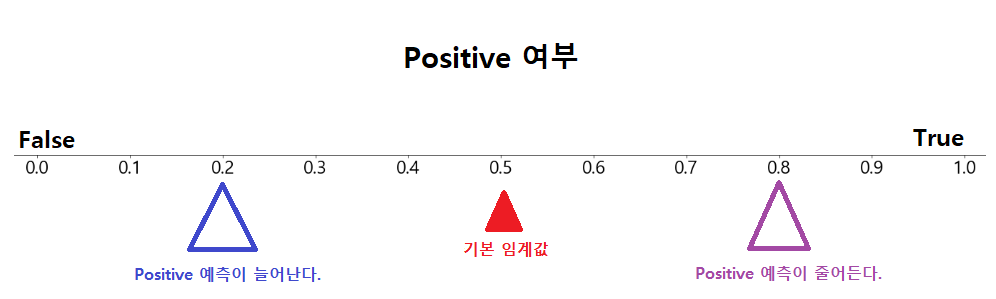

### 임계값 변화에 따른 recall, precision 변화

In [31]:
from sklearn.metrics import precision_recall_curve

#tree.predict_proba(X_test)  # [False(0), True(1)]일 확률
pos_proba = tree.predict_proba(X_test)[:, 1]  # 1번축(True)만 가져온다.
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba)  #thresholds = 임계값
precisions.shape, recalls.shape, thresholds.shape

((8,), (8,), (7,))

In [32]:
import pandas as pd

pd.DataFrame({
    'threshold': thresholds,
    'precision': precisions[:-1],
    'recall': recalls[:-1]
})

threshold  precision    recall
0   0.006757   0.103211  1.000000
1   0.014208   0.113456  0.955556
2   0.035714   0.512821  0.888889
3   0.127660   0.606061  0.888889
4   0.333333   0.716981  0.844444
5   0.441176   0.730769  0.844444
6   0.736842   0.755556  0.755556

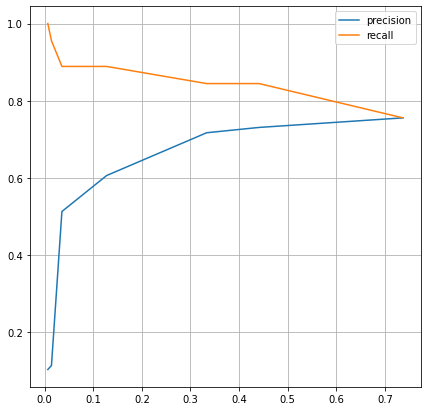

In [33]:
plt.figure(figsize = (7, 7))
plt.plot(thresholds, precisions[:-1], label = 'precision')
plt.plot(thresholds, recalls[:-1], label = 'recall')
plt.legend()
plt.grid(True)
plt.show()

### Binarizer - 임계값 변경
- Transformer로 양성 여부를 선택하는 임계값을 변경할 수 있다.

In [34]:
from sklearn.preprocessing import Binarizer

In [35]:
example = [[0.3, 0.5, 0.7, 0.4, 0.6]]
bi = Binarizer(threshold = 0.5)  # threshold 기본값은 0으로 되어 있다.
bi.fit(example)
bi.transform(example)

array([[0., 0., 1., 0., 1.]])

In [36]:
# 머신러닝 모델에 적용
pos_proba = tree.predict_proba(X_test)

binarizer = Binarizer(threshold = 0.5)
binarizer = Binarizer(threshold = 0.2)
binarizer = Binarizer(threshold = 0.6)  # threshold(임계값)의 변화에 따라 pred_test_tree와 다른 결과가 나옴을 볼 수 있다.
# -> pred_test_tree는 임계값을 0.5로 두고 한 것임을 알 수 있다.

binarizer.fit(pos_proba)
predict = binarizer.transform(pos_proba)[:, 1]
accuracy_score(pred_test_tree, predict)

1.0

In [37]:
recall_score(y_test, predict), precision_score(y_test, predict)

(0.7555555555555555, 0.7555555555555555)

## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- 0~1사이의 모든 임계값에 대하여 재현율(recall)과 정밀도(precision)의 변화를 이용한 평가 지표
- X축에 재현율, Y축에 정밀도를 놓고 임계값이 0 → 1 변화할때 두 값의 변화를 선그래프로 그린다.
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
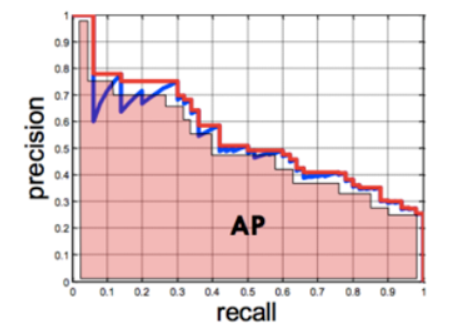   

In [57]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score

pos_proba = tree.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba)  # y, positive_예측확률
precisions.shape, recalls.shape, thresholds.shape

((8,), (8,), (7,))

In [58]:
thresholds = np.append(thresholds, 1)
thresholds

array([0.00675676, 0.01420765, 0.03571429, 0.12765957, 0.33333333,
       0.44117647, 0.73684211, 1.        ])

In [59]:
pd.DataFrame({
    'Threshold': thresholds,
    'Recall': recalls,
    'Precision': precisions
})

Threshold    Recall  Precision
0   0.006757  1.000000   0.103211
1   0.014208  0.955556   0.113456
2   0.035714  0.888889   0.512821
3   0.127660  0.888889   0.606061
4   0.333333  0.844444   0.716981
5   0.441176  0.844444   0.730769
6   0.736842  0.755556   0.755556
7   1.000000  0.000000   1.000000

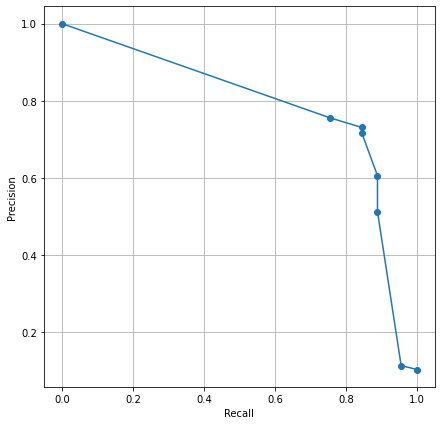

In [60]:
plt.figure(figsize = (7, 7))
plt.plot(recalls, precisions, marker = 'o')  # X: recall, y: precision
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

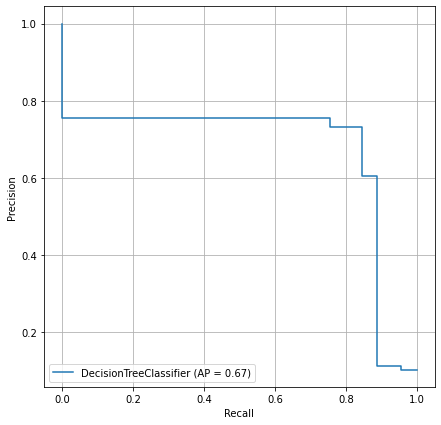

In [61]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
# ax = plt.gca()
plot_precision_recall_curve(tree,  # 모델
                            X_test,  # X값
                            y_test,  # y값
                            ax = ax)
plt.grid(True)
plt.show()

In [62]:
# 위의 그래프에서 계산된 AP score를 이런 방법으로도 계산할 수 있다.
average_precision_score(y_test, pos_proba)  # (y, pos_예측확률)

0.6749084096794553

# TODO
- train set에 대해 PR curve, AP score 출력, DataFrame으로 PR Curve 반환값 생성

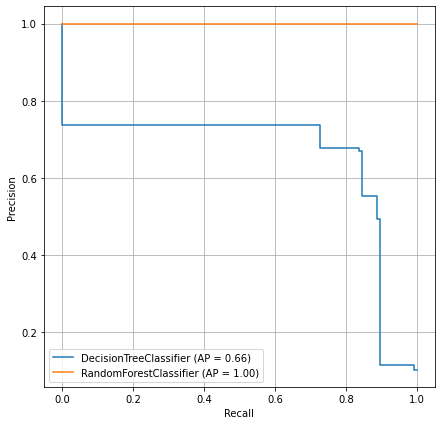

In [71]:
plt.figure(figsize = (7, 7))
ax = plt.gca()  # get current axes
plot_precision_recall_curve(tree,
                            X_train,
                            y_train, 
                            ax = ax)
plot_precision_recall_curve(rf,
                            X_train,
                            y_train,
                            ax = ax)
plt.grid(True)
plt.show()

In [64]:
pos_proba_train = tree.predict_proba(X_train)[:, 1]
precisions_train, recalls_train, thresholds_train = precision_recall_curve(y_train, pos_proba_train)  # y, positive_예측확률
thresholds_train = np.append(thresholds_train, 1)

pd.DataFrame({
    'Threshold': thresholds_train,
    'Precision': precisions_train,
    'Recall': recalls_train
})

Threshold  Precision    Recall
0   0.006757   0.103211  1.000000
1   0.014208   0.115517  0.992593
2   0.035714   0.493878  0.896296
3   0.127660   0.552995  0.888889
4   0.333333   0.670588  0.844444
5   0.441176   0.676647  0.837037
6   0.736842   0.736842  0.725926
7   1.000000   1.000000  0.000000

In [69]:
pos_proba_train_rf = rf.predict_proba(X_train)[:, 1]
precision_train_rf, recall_train_rf, threshold_train_rf = precision_recall_curve(y_train, pos_proba_train_rf)
threshold_train_rf = np.append(threshold_train_rf, 1)

pd.DataFrame({
    'Threshold': threshold_train_rf,
    'Precision': precision_train_rf,
    'Recall': recall_train_rf
})

Threshold  Precision    Recall
0       0.635        1.0  1.000000
1       0.640        1.0  0.992593
2       0.650        1.0  0.985185
3       0.660        1.0  0.977778
4       0.670        1.0  0.970370
5       0.705        1.0  0.962963
6       0.735        1.0  0.955556
7       0.745        1.0  0.940741
8       0.750        1.0  0.925926
9       0.755        1.0  0.911111
10      0.760        1.0  0.903704
11      0.770        1.0  0.881481
12      0.780        1.0  0.851852
13      0.785        1.0  0.837037
14      0.790        1.0  0.829630
15      0.795        1.0  0.800000
16      0.805        1.0  0.777778
17      0.815        1.0  0.762963
18      0.820        1.0  0.755556
19      0.825        1.0  0.725926
20      0.830        1.0  0.703704
21      0.835        1.0  0.688889
22      0.840        1.0  0.681481
23      0.845        1.0  0.644444
24      0.850        1.0  0.637037
25      0.855        1.0  0.622222
26      0.860        1.0  0.600000
27      0.865        1.0  0.577778
28      0.875        1.0  0.540741
29      0.880        1.0  0.525926
30      0.885        1.0  0.518519
31      0.890        1.0  0.511111
32      0.895        1.0  0.496296
33      0.900        1.0  0.451852
34      0.905        1.0  0.414815
35      0.910        1.0  0.400000
36      0.915        1.0  0.385185
37      0.920        1.0  0.355556
38      0.925        1.0  0.303704
39      0.930        1.0  0.296296
40      0.935        1.0  0.259259
41      0.940        1.0  0.237037
42      0.945        1.0  0.214815
43      0.950        1.0  0.200000
44      0.955        1.0  0.185185
45      0.960        1.0  0.162963
46      0.965        1.0  0.140741
47      0.970        1.0  0.125926
48      0.975        1.0  0.081481
49      0.980        1.0  0.051852
50      0.985        1.0  0.044444
51      0.990        1.0  0.029630
52      0.995        1.0  0.022222
53      1.000        1.0  0.000000

In [65]:
average_precision_score(y_train, pos_proba_train)

0.6551674088758679

In [70]:
average_precision_score(y_train, pos_proba_train_rf)

1.0

## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    $$
    \frac{TP}{FN+TP}
    $$
- **ROC 곡선**
    - 2진 분류의 모델 성능 평가 지표 중 하나.
    - 불균형 데이터셋을 평가할 때 사용.
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
- **AUC**
    - ROC 곡선 아래쪽 면적
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

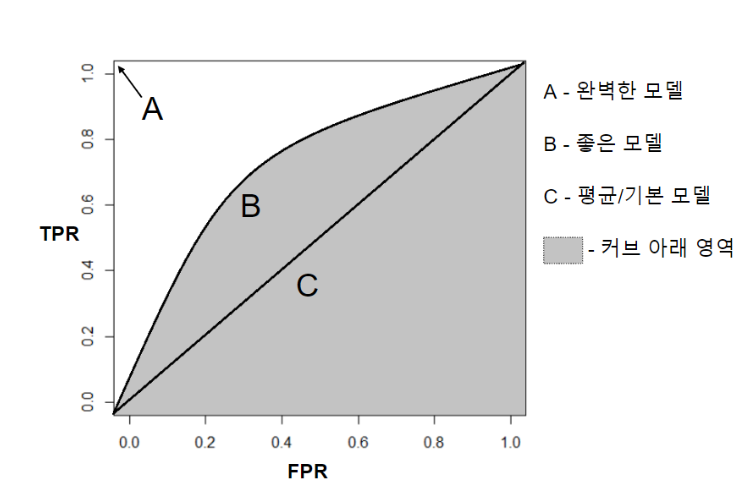

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다.  
일반적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, AUC 점수  확인
- roc_curve(y값, 예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, 예측확률) : AUC 점수 반환

## ROC Curve - PR Curve
- ROC: 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- PR curve(Precision Recall 커브): 양성 클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

In [72]:
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

pos_proba_tree = tree.predict_proba(X_test)[:, 1]
pos_proba_rf = rf.predict_proba(X_test)[:, 1]

fpr_tree, tpr_tree, threshold_tree = roc_curve(y_test, pos_proba_tree)  # y, pos_예측확률
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, pos_proba_rf)  # y, pos_예측확률

In [73]:
pd.DataFrame(dict(th = threshold_tree, fpr = fpr_tree, tpr = tpr_tree))

th       fpr       tpr
0  1.736842  0.000000  0.000000
1  0.736842  0.027160  0.755556
2  0.441176  0.034568  0.844444
3  0.333333  0.037037  0.844444
4  0.127660  0.064198  0.888889
5  0.035714  0.093827  0.888889
6  0.014208  0.829630  0.955556
7  0.006757  0.965432  1.000000
8  0.000000  1.000000  1.000000

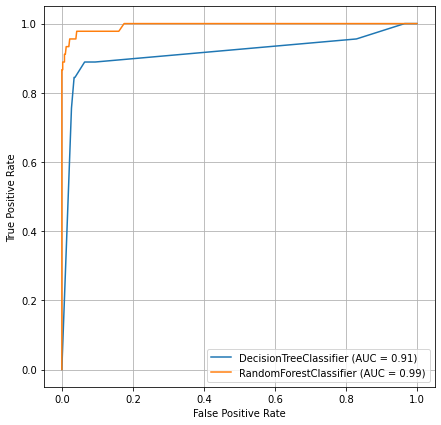

In [75]:
plt.figure(figsize = (7, 7))
ax = plt.gca()
plot_roc_curve(tree, X_test, y_test, ax = ax)
plot_roc_curve(rf, X_test, y_test, ax = ax)
plt.grid(True)
plt.show()

In [78]:
print("tree: ", roc_auc_score(y_test, pos_proba_tree))
print("random forest: ", roc_auc_score(y_test, pos_proba_rf))

tree:  0.9140740740740743
random forest:  0.9944307270233197
